# DAA M06 Unsupervised learning
## Exercise 6.1 - PCA on COVID dataset

### Purpose:
This notebook performs Principal Component Analysis (PCA) on COVID data.

### References:
The dataset that is used in this exercise was sourced from Our World in Data: https://ourworldindata.org/covid-cases.

This dataset was downloaded from the above link on 31 March 2021. It contains country-by-country data on confirmed coronavirus disease (COVID-19) cases and at the time of writing is updated on a daily basis.

The data contains COVID-19 and population related features for over 100 countries. These features include:
- total cases per million people;
- total new cases per million people;
- total deaths per million people;
- new deaths per million people;
- reproduction rate of the disease;
- positive testing rate;
- total tests per thousand people;
- icu patients per million people; and
- hospital patients per million people.

## Packages
This section installs packages that will be required for this exercise/case study.

In [1]:
import pandas as pd # For data management.
import numpy as np # For mathematical operations.

# For plotting.
import matplotlib.pyplot as plt
import seaborn as sns
  # Seaborn is a data visualisation package that will be used below to
  # create a heatmap.

# The following Scikit-learn libraries are used to standardise the
# features and perform PCA.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# The files library allows you to browse your directory
# to upload the necessary dataset.
from google.colab import files


/home/analytics-user/anaconda3/lib/python3.6/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


## Data
This section:
- imports the data that will be used in the modelling;
- explores the data; and
- prepares the data for modelling.

### Import data
The code below uploads the csv file to Google Colab.

When prompted, select the *DAA_M06_COVID_data.csv* dataset to upload.

In [3]:
# files.upload()
# covid = pd.read_csv('/content/DAA_M06_COVID_data.csv', header = 0)
covid = pd.read_csv('/data/projects/personal/daa_2021s1/06 Unsupervised Learning/DAA_M06_COVID_data.csv', header = 0)

# The csv file is quite large so it may take a few minutes for it to be
# uploaded.

# Note that the following code could be used to read the most
# recent data in directly from the Our World in Data website:

# covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')


### Explore data

In [4]:
# Check the number of observations and features of the dataset.
print(covid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78259 entries, 0 to 78258
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               78259 non-null  object 
 1   continent                              74436 non-null  object 
 2   location                               78259 non-null  object 
 3   date                                   78259 non-null  object 
 4   total_cases                            76704 non-null  float64
 5   new_cases                              76702 non-null  float64
 6   new_cases_smoothed                     75701 non-null  float64
 7   total_deaths                           67325 non-null  float64
 8   new_deaths                             67483 non-null  float64
 9   new_deaths_smoothed                    75701 non-null  float64
 10  total_cases_per_million                76287 non-null  float64
 11  ne

In [7]:
covid[covid['location']=='Australia']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
4084,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944
4085,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944
4086,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944
4087,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944
4088,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,AUS,Oceania,Australia,2021-03-25,29239.0,9.0,8.000,909.0,0.0,0.0,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944
4509,AUS,Oceania,Australia,2021-03-26,29252.0,13.0,8.571,909.0,0.0,0.0,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944
4510,AUS,Oceania,Australia,2021-03-27,29259.0,7.0,9.000,909.0,0.0,0.0,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944
4511,AUS,Oceania,Australia,2021-03-28,29276.0,17.0,10.000,909.0,0.0,0.0,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.944


### Prepare data

In [8]:
# Restrict the data to only look at one point in time (31-Dec-2020).
covid2 = covid[covid['date']=='2020-12-31']

# This analysis will use nine features.
# The column 'location' is also retained to give us the country names.
# Countries that have any missing values at the extract date are dropped from
# the data table using the .dropna() method.

covid3 = covid2[['location','total_cases_per_million','new_cases_per_million',
                   'total_deaths_per_million','new_deaths_per_million',
                   'reproduction_rate','positive_rate','total_tests_per_thousand',
                 'icu_patients_per_million','hosp_patients_per_million']].dropna()

covid_data = covid3.drop(columns='location')
print(covid_data.info())

countries = covid3['location'].tolist()
print(countries)

print(covid_data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 4823 to 74527
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_cases_per_million    17 non-null     float64
 1   new_cases_per_million      17 non-null     float64
 2   total_deaths_per_million   17 non-null     float64
 3   new_deaths_per_million     17 non-null     float64
 4   reproduction_rate          17 non-null     float64
 5   positive_rate              17 non-null     float64
 6   total_tests_per_thousand   17 non-null     float64
 7   icu_patients_per_million   17 non-null     float64
 8   hosp_patients_per_million  17 non-null     float64
dtypes: float64(9)
memory usage: 1.3 KB
None
['Austria', 'Belgium', 'Bulgaria', 'Canada', 'Cyprus', 'Denmark', 'Estonia', 'Finland', 'Ireland', 'Israel', 'Italy', 'Luxembourg', 'Portugal', 'Slovenia', 'Spain', 'United Kingdom', 'United States']
       total_cases_per_million 

## Modelling
This section:
- performs PCA; and
- explores the new features generated by PCA.

### Perform PCA

In [9]:
# Perform PCA on the COVID data.

# Create an instance of StandardScalar so that the features
# of the dataset can be scaled during the PCA.
scaler = StandardScaler()

# Create a PCA object called 'pca_model'.
pca_model = PCA()

# Create a pipeline so that the dataset features are scaled and then
# a PCA model is fit to the scaled data.
pipeline = make_pipeline(scaler,pca_model)

# Fit a pca model to the scaled Covid dataset
# to find its principal components.
pipeline.fit(covid_data)

# Create an array containing each observation from the Covid dataset and
# the nine principal components calculated for each observation.
pca_features = pipeline.transform(covid_data)

In [14]:
pca_features


array([[ 0.26282565, -0.00734234,  0.55358288,  0.08707549,  0.31960348,
        -0.56973287, -0.31987624,  0.40457958,  0.37702425],
       [ 0.66740908,  1.29229396,  0.23831704,  2.02599822,  0.73673995,
        -0.47073079,  0.19333303,  0.10261747, -0.03782636],
       [ 2.61333004, -0.0595483 ,  2.75221892, -0.15121981, -0.69050759,
         0.67961184,  0.13797836, -0.11392382,  0.12306464],
       [-1.98352197, -0.77295214,  0.7209224 ,  0.13227081,  0.24854506,
        -0.32039091, -0.15173263,  0.03284214, -0.16670926],
       [-2.61171197,  0.3918175 ,  0.32983169, -0.28433366, -0.65197996,
         0.32201937, -0.45694135, -0.40092104,  0.06040168],
       [-1.85578201,  1.21120821, -0.16487283, -1.2599258 ,  1.32965856,
         0.45318957, -0.12526831,  0.04513359, -0.14221769],
       [-0.5119211 , -1.10796404,  0.70828611, -1.23520032, -0.6420561 ,
        -0.39084852,  0.51785976,  0.42547445, -0.142251  ],
       [-3.5031411 , -0.6305079 ,  1.26372993, -0.08409998,  0

## Evaluate model

### Analyse correlation between features

In [15]:
# Plot a correlation matrix for the principal components to check that they are
# uncorrelated.

# Convert the pca_features array into a Pandas dataframe.
pca_df = pd.DataFrame(pca_features)

# Calculate the correlation between the nine principal components.
pd.set_option('display.max_columns', 9)
  # The display.max_columns option ensures that all nine columns
  # are shown when the correlation matrix is printed.
print('Correlation matrix for principal components\n')
print(pca_df.corr().round(2))
  # The correlations have been rounded to 2dp to make them easier to read.
print('\nCorrelation matrix for original Covid data\n')
print(covid_data.corr().round(2))
  # The correlations have been rounded to 2dp to make them easier to read.

Correlation matrix for principal components

     0    1    2    3    4    5    6    7    8
0  1.0  0.0 -0.0  0.0  0.0  0.0  0.0 -0.0 -0.0
1  0.0  1.0  0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0
2 -0.0  0.0  1.0  0.0 -0.0 -0.0  0.0  0.0 -0.0
3  0.0 -0.0  0.0  1.0  0.0  0.0 -0.0 -0.0 -0.0
4  0.0  0.0 -0.0  0.0  1.0  0.0 -0.0  0.0  0.0
5  0.0 -0.0 -0.0  0.0  0.0  1.0 -0.0  0.0 -0.0
6  0.0  0.0  0.0 -0.0 -0.0 -0.0  1.0 -0.0 -0.0
7 -0.0  0.0  0.0 -0.0  0.0  0.0 -0.0  1.0 -0.0
8 -0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0  1.0

Correlation matrix for original Covid data

                           total_cases_per_million  new_cases_per_million  \
total_cases_per_million                       1.00                   0.33   
new_cases_per_million                         0.33                   1.00   
total_deaths_per_million                      0.62                   0.27   
new_deaths_per_million                        0.33                   0.67   
reproduction_rate                            -0.22     

You can see from the top correlation matrix that all the correlation coefficients of the principal components are 0. In other words, each of the nine principal components is uncorrelated with each other.
 
This differs from the original COVID dataset. The second correlation matrix shows that some of the original features of the dataset are highly correlated (e.g. correlation coefficient of new_deaths_per_million and hosp_patients_per_million is 0.69). This suggests some redundancy in using both of these features in any analysis of the dataset.

### Create scree plot

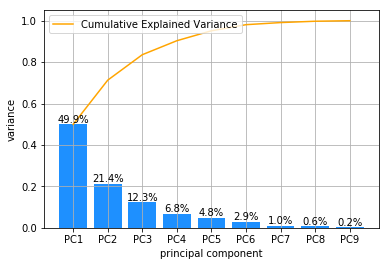

In [16]:
# Create a scree plot to determine the intrinsic dimension of the dataset.

# Create a sequence of labels for each principal component in the
# scree plot below.
components = ['PC'+str(x+1) for x in range(pca_model.n_components_)]

# Plot the variance explained by each component individually as a bar plot.
plt.bar(components, pca_model.explained_variance_ratio_,
        color='dodgerblue')

# Plot the cumulative variance explained by the components as a line plot.
plt.plot(components,np.cumsum(pca_model.explained_variance_ratio_),
         c='orange',
         label="Cumulative Explained Variance")

# Add labels to the plot.
plt.xlabel('principal component')
plt.ylabel('variance')
plt.xticks(components)
plt.legend(loc='upper left')
plt.grid(True)

# Add labels on the bar plot to show the amount of variance explained
# by each principal component.
np.set_printoptions(precision=2) # This limits any output to 2dp.
var_exp = pca_model.explained_variance_ratio_
for i in range(len(components)):
    plt.annotate('{:.1%}'.format(var_exp[i]), \
                 xy=(components[i],var_exp[i]), ha='center', va='bottom')

# plt.savefig('DAA M06 Fig4.jpg')
plt.show()

From the scree plot above:
- PC1 explains 49.9% of the variance in the dataset;
- PC2 explains another 21.4% of the variance;
- PC3 explains a further 12.3% of the variance; and
- PC4 explains another 6.8% of the variance.

The intrinsic dimension of a dataset is the minimum number of features required to describe the data. In this case, it could be argued that the COVID dataset has an intrinsic dimension of four, as the first four principal components explain a large proportion (approximately 90%) of the variance in the COVID dataset.

### Analyse contribution of original features

In [17]:
# Analyse the contribution of each Covid dataset feature to the
# first three principal components.

# Once the PCA model has been fitted to the data, it is helpful to 
# examine the contribution of the original Covid dataset features
# to each of the principal components.
# This is achieved below by creating a heatmap.

sns.heatmap(pca_model.components_,
                 cmap='coolwarm',
                 yticklabels=components,
                 xticklabels=list(covid_data.columns),
                 cbar_kws={"orientation": "vertical"})
plt.savefig('DAA M06 Fig5.jpg', bbox_inches='tight')
  # The argument 'bbox_inches = 'tight'' is added to ensure that the saved
  # figure does not cut off any of the x axis labels, which are long.

The 'components_' attribute of the PCA model contains the loadings for each principal component (i.e. the coefficients of the linear equations from which each principal component has been constructed).

By plotting these coefficients in the heatmap above, the level of influence of each original feature in the COVID dataset on each of the principal components can be seen.

An examination of the heatmap above suggests that:
- the first principal component (PC1) is positively influenced by many of the original features from the COVID dataset, with 'reproduction_rate' and 'total_tests_per_thousand' having a slight negative influence;
- PC2 is most strongly positively influenced by the features 'total_cases_per_million' and 'total_tests_per_thousand' and is most strongly negatively influenced by ‘reproduction rate’; and
- PC3 is most (negatively) influenced by 'reproduction rate' and 'new_cases_per_million'.


### Visualise dataset on first two principal components
The scree plot above suggests that just over 70% of the variance of the dataset is explained by the first two principal components. Therefore, it might be useful to visualise the COVID dataset by plotting each country against the first two principal components, to see what patterns emerge.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      17 non-null     int64  
 1   location                   17 non-null     object 
 2   total_cases_per_million    17 non-null     float64
 3   new_cases_per_million      17 non-null     float64
 4   total_deaths_per_million   17 non-null     float64
 5   new_deaths_per_million     17 non-null     float64
 6   reproduction_rate          17 non-null     float64
 7   positive_rate              17 non-null     float64
 8   total_tests_per_thousand   17 non-null     float64
 9   icu_patients_per_million   17 non-null     float64
 10  hosp_patients_per_million  17 non-null     float64
 11  index                      17 non-null     int64  
 12  0                          17 non-null     float64
 13  1                          17 non-null     float64
 

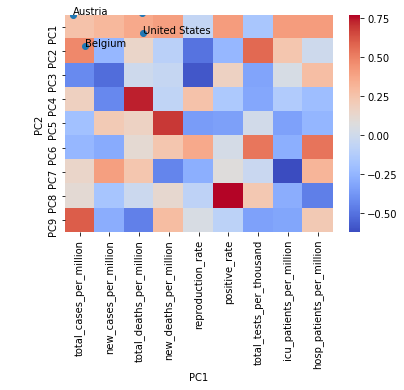

In [18]:
# Plot each country in the COVID dataset against the first
# two principal components.

# Join the original COVID dataset with the dataframe containing
# the calculated principal components.

covid_joined = pd.concat([covid3.reset_index(),pca_df.reset_index()],
                         axis=1)
  # .reset_index() is used because the two datasets being joined have
  # different indexes but they each represent the same list of countries.
  # .reset_index() makes them both have the same index so that the columns
  # in the two datasets are just joined together side by side.
  # axis=1 specifies that the datasets should be joined by columns rather than
  # by rows (axis=0)
print(covid_joined.info())

# Create a scatter plot of the dataset based on PC1 and PC2.
plt.scatter(covid_joined[0],covid_joined[1])
plt.xlabel('PC1')
plt.ylabel('PC2')

## Add the country labels to each point in the scatter plot.
for i, txt in enumerate(countries):
    plt.annotate(txt, (covid_joined[0][i], covid_joined[1][i]))

#plt.savefig('DAA M06 Fig6.jpg')
plt.show()
